Note that the variables in the houshold problem e, a, are in terms of non-tradable goods. We can convert them to tradable goods by multiplying them by the price of the non-tradable good. Consumption outputs c are in real terms.

In [6]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})


from IHANKModel import IHANKModelClass





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# options
model = IHANKModelClass(name='baseline')
set_options = True
if set_options:


    run_test = False
    save_figs = False

    # Options for figures
    path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL1703/fig/1903/'
    lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
    path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
    paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
    target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']
    paths_ = ['PE', 'PT', 'p', 'CT', 'CNT', 'YH', 'P', 'W', 'w', 'PF']

    # Options for shock 

    shock_PE_i, shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=0.05, rho = 0.8) 
    
    # Options for tables
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Increase width to avoid line breaks
    pd.set_option('display.colheader_justify', 'center')  # Center column headers

    # Options for comparing models
    ddd = SimpleNamespace()
    ddd.T_max = 50
    ddd.ncols = 3
    ddd.varnames = model.varlist
    ddd.lvl_value = lvl_path
    ddd.do_shocks = False
    ddd.do_targets = False





In [8]:



# Parameters to look at 
# model.par.eta_s = 0.51
# model.par.etaF = 0.51
# model.par.nu = 0.7
# model.par.etaE = 0.01
# model.par.mon_policy = 'taylor'
# model.par.phi = 1.5
# model.par.kappa = 2.0
# model.par.gamma = 0.4
# model.par.nu = 0.3


model.find_ss(do_print=False)
model.compute_jacs()


In [9]:
model_baseline = model.copy(name='Baseline')
model_baseline.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [10]:
model_homothetic = model.copy(name='Homothetic')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
# model_homothetic.pref = 'homothetic' # Only consumption composition is determined by PIGL
model_homothetic.find_ss()
model_homothetic.compute_jacs()
model_homothetic.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [11]:
model_CES = model.copy(name='CES')
model_CES.par.gamma = model.par.epsilon = 0.18
model_CES.find_ss()
model_CES.compute_jacs()
model_CES.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [12]:
model_CB = model.copy(name='CB')
model_CB.par.gamma  = 0.0
model_CB.par.epsilon = 0.0
model_CB.find_ss()
model_CB.compute_jacs()
model_CB.find_transition_path(shocks=shock_PE_s, do_end_check=False)

['Baseline', 'Homothetic', 'CES', 'CB']


/Users/emmagundersen/GEModelTools/GEModelTools/figures.py:107: RuntimeWarning: divide by zero encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)
/Users/emmagundersen/GEModelTools/GEModelTools/figures.py:107: RuntimeWarning: invalid value encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


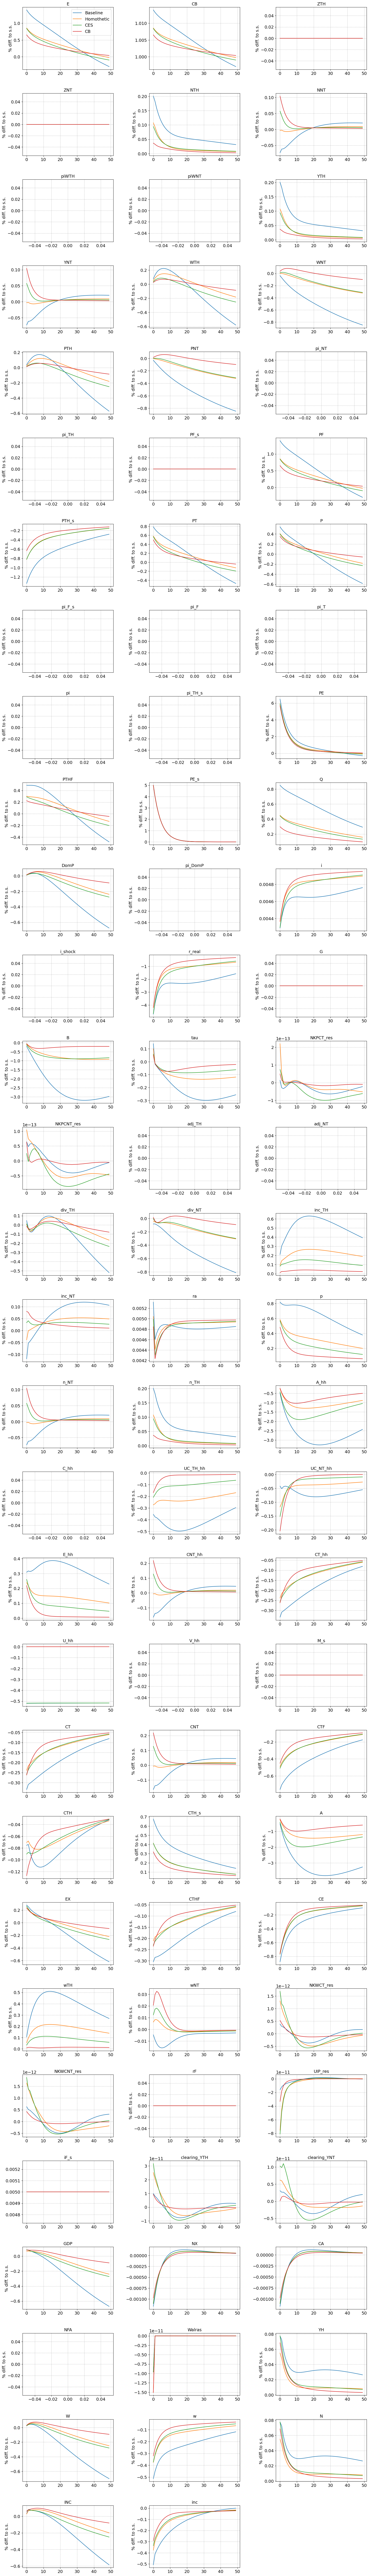

In [13]:
model_list = [model_baseline, model_homothetic, model_CES, model_CB]
figs.compare_IRFs_(model_list, ddd)

In [135]:
model_homothetic_only_consumption = model.copy(name='Homothetic only consumption')
model_homothetic_only_consumption.par.pref = 'CUBB_douglas'

model_homothetic_only_consumption.find_ss()
model_homothetic_only_consumption.compute_jacs()
model_homothetic_only_consumption.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [109]:
# Model where expenditure is epsilon = 0.0 but consumption choices are non-homothetic
model_e_ = model.copy(name='homothetic like expenditure decision')
model_e_.par.pref = 'PIGL_forces'
model_e_.par.epsilon = 0.0
model_e_.find_ss()
model_e_.compute_jacs()
model_e_.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [122]:
for modle in models:
    print(f'{modle.name}, etaT = {modle.par.eta_T_RA:.2f}, omegaT = {model.par.omega_T:.2f}')



Homothetic, etaT = 0.40, omegaT = 0.70
Baseline, etaT = 0.40, omegaT = 0.70
Homothetic only consumption, etaT = 0.40, omegaT = 0.70
homothetic expenditure decision, etaT = 0.03, omegaT = 0.70


['Homothetic', 'Baseline', 'Homothetic only consumption', 'homothetic expenditure decision']


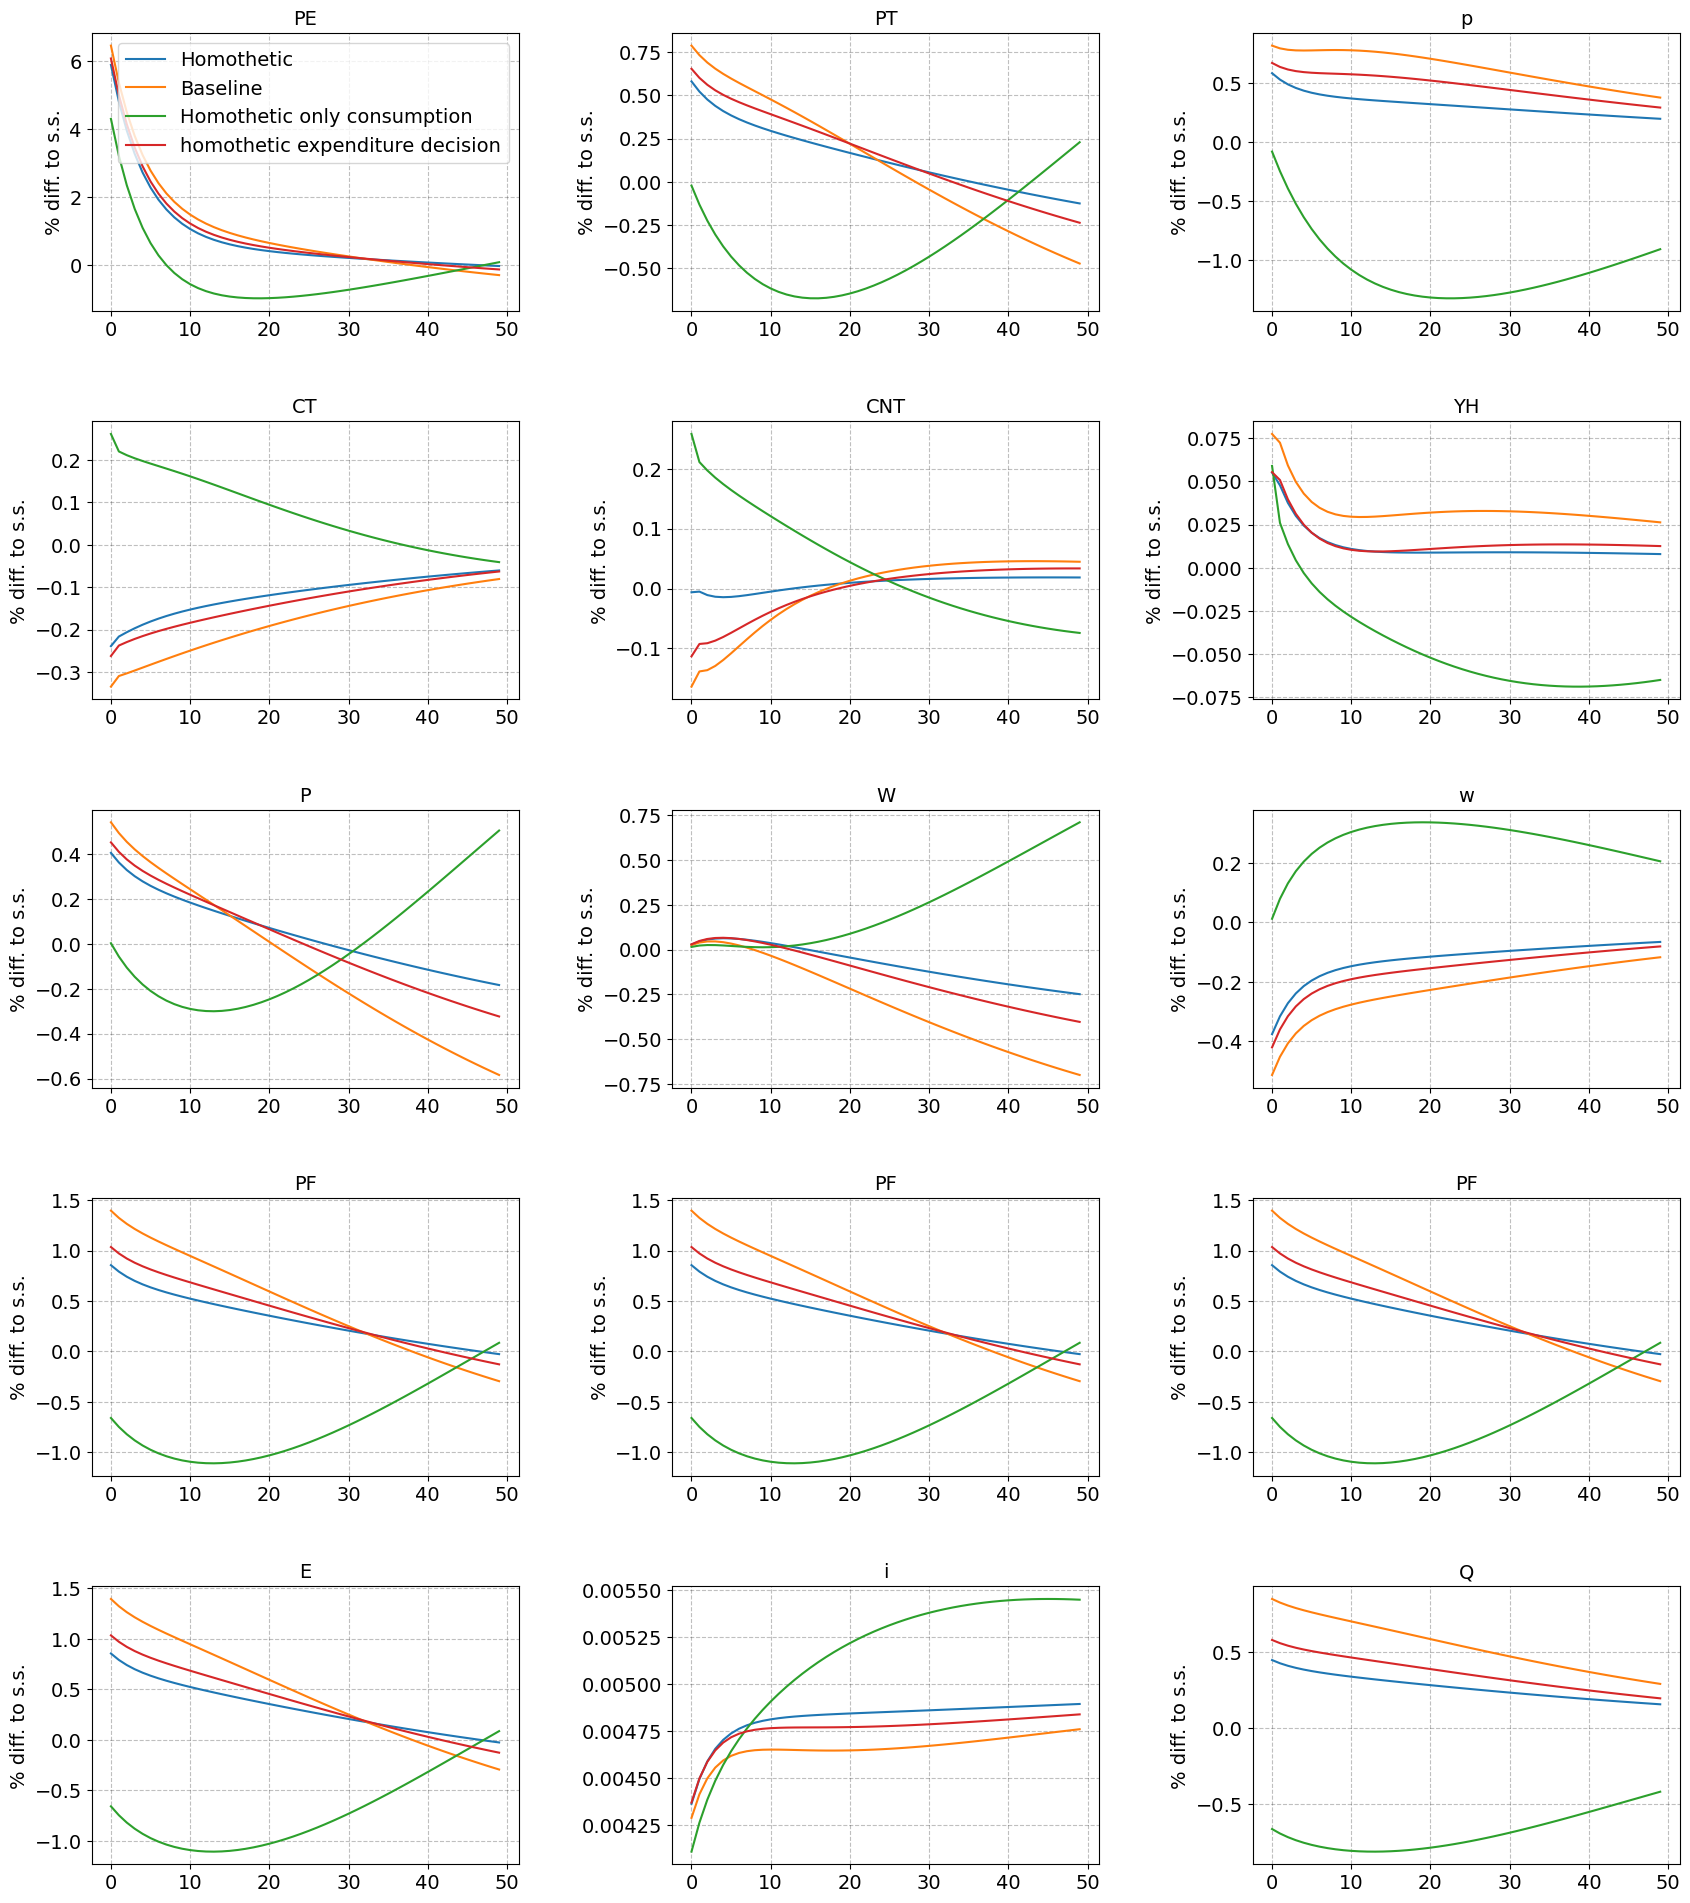

In [120]:

models = [model_baseline, model_homothetic, model_homothetic_only_consumption, model_e_]

models = [ model_homothetic, model_baseline, model_homothetic_only_consumption, model_e_]
ddd.varnames = paths_

figs.compare_own(models, ddd)

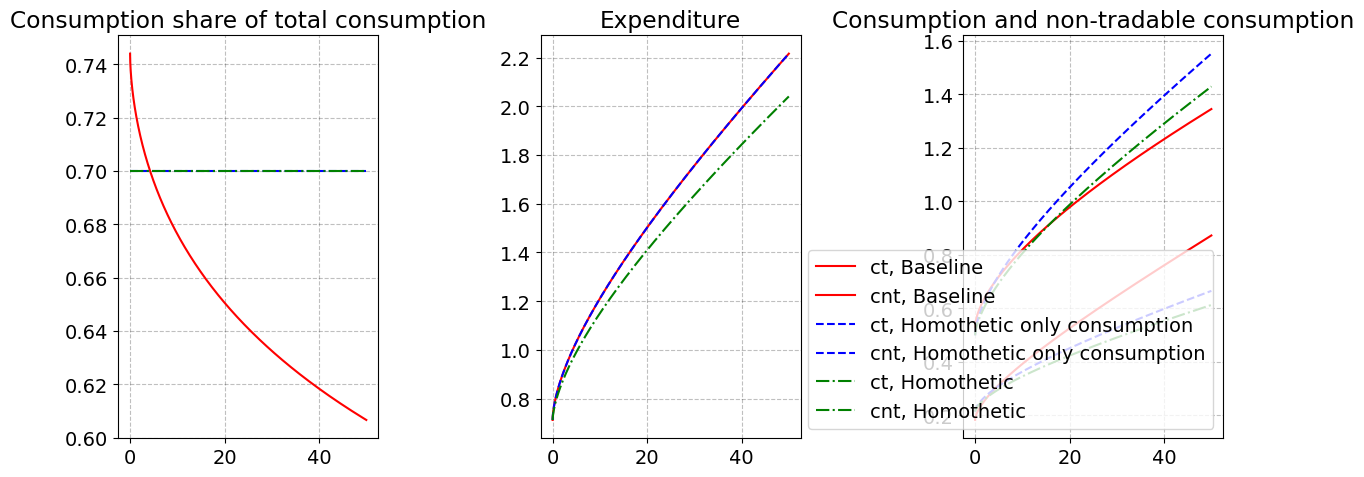

In [118]:
i_z = 3
models_list = [model_baseline, model_homothetic_only_consumption , model_homothetic]

line_styles = ['-', '--', '-.', ':']
colors = ['r', 'b', 'g']

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131)

# for model in models_list:
for i, model in enumerate(models_list):

    ct_share = model.ss.ct[0,i_z,:]/ (model.ss.ct[0,i_z,:]+ model.ss.cnt[0,i_z,:])
    e = model.ss.e[0,i_z,:]
    a = model.par.a_grid[:]
    ax1.plot(a,ct_share, label=model.name, linestyle= line_styles[i], color=colors[i])

ax1.set_title('Consumption share of total consumption')


ax2 = fig.add_subplot(132)
for i, model in enumerate(models_list):
    e = model.ss.e[0,i_z,:]
    a = model.par.a_grid[:]
    savings = model.ss.a[0,i_z,:]
    ax2.plot(a,e, label=model.name, linestyle= line_styles[i], color=colors[i])
    # ax2.plot(a,savings, label=model.name, linestyle= line_styles[i], color=colors[i])

ax2.set_title('Expenditure')


# Expenditure share of total expenditure
ax3 = fig.add_subplot(133)
for i, model in enumerate(models_list):
    e = model.ss.e[0,i_z,:]
    ct = model.ss.ct[0,i_z,:]
    cnt = model.ss.cnt[0,i_z,:]
    ax3.plot(a,ct, label=f'ct, {model.name}', linestyle= line_styles[i], color=colors[i])
    ax3.plot(a,cnt, label=f'cnt, {model.name}', linestyle= line_styles[i], color=colors[i])

ax3.set_title('Consumption and non-tradable consumption')
# Legend below the plot
ax3.legend(loc='lower right')


fig.tight_layout()

# ct_share = model.ss.ct[0,i_z,:]/ (model.ss.ct[0,i_z,:]+ model.ss.cnt[0,i_z,:])
# a = model.par.a_grid[:]
# ax.plot(a,ct_share, label=i_z, color=colors[i_z])

# ax.plot(e_, ct_share, label='ct_share', color=colors[3])


In [128]:
model.par.__dict__['nu']

0.7

In [136]:

# List of models
models_list = [model_baseline, model_homothetic_only_consumption , model_homothetic, model_e_]
model_names = []
for i in models_list:
    model_names.append(i.name)




# List of variables
varlist = ['CT', 'CNT', 'E_hh', 'YTH', 'YNT', 'inc_TH', 'inc_NT', 'NTH', 'NNT', 'div_NT', 'div_TH', 'A_hh','CE', 'CTHF', 'CTH', 'CTH_s' ]
par_list = ['nu', 'epsilon', 'gamma', 'eta_T_RA', 'omega_T']

model.par.__dict__['nu']


# Create a dictionary to store values
data = {}

# Loop through each model and extract steady-state values
for model, name in zip(models_list, model_names):
    try:
        data[name] = [getattr(model.ss, var) for var in varlist]
    except:
        print(f"Could not extract")
# Create DataFrame
df = pd.DataFrame(data, index=varlist)

# rounding to 2 decimals
df = df.round(2)


# Add the percentage change from the baseline
df_pct = df.pct_change(axis=1) * 100

df_pct

,Baseline,Homothetic only consumption,Homothetic,homothetic expenditure decision
CT,NaN,-3.636364,0.0,3.773585
CNT,NaN,15.000000,0.0,-13.043478
E_hh,NaN,0.000000,0.0,0.000000
YTH,NaN,-3.636364,0.0,3.773585
YNT,NaN,4.444444,0.0,-4.255319
inc_TH,NaN,-2.439024,0.0,2.500000
inc_NT,NaN,2.941176,0.0,-2.857143
NTH,NaN,-3.636364,0.0,3.773585
NNT,NaN,4.444444,0.0,-4.255319
div_NT,NaN,14.285714,0.0,-12.500000


In [137]:
import pandas as pd

# List of models
models_list = [model_baseline, model_homothetic_only_consumption, model_homothetic, model_e_]
model_names = [model.name for model in models_list]

# List of variables and parameters
varlist = ['CT', 'CNT', 'E_hh', 'YTH', 'YNT', 'inc_TH', 'inc_NT', 'NTH', 'NNT', 'div_NT', 'div_TH', 'A_hh', 'CE', 'CTHF', 'CTH', 'CTH_s']
par_list = [ 'nu', 'epsilon', 'gamma', 'eta_T_RA', 'omega_T'] #  'pref'

# Create a dictionary to store values
data = {}

# Extract steady-state values
for model, name in zip(models_list, model_names):
    try:
        data[name] = [getattr(model.ss, var) for var in varlist]
    except Exception as e:
        print(f"Could not extract data for {name}: {e}")

# Create DataFrame for steady-state variables and round
df = pd.DataFrame(data, index=varlist).round(2)

# Compute percentage change from the baseline
df_pct = df.pct_change(axis=1) * 100

# Extract parameters for each model
params_data = {name: [getattr(model.par, par) for par in par_list] for model, name in zip(models_list, model_names)}

# Create DataFrame for parameters and round
df_params = pd.DataFrame(params_data, index=par_list).round(2)

# Concatenate parameters above the percentage change DataFrame
df_final = pd.concat([df_params, df_pct])

# Display the full DataFrame without truncation
# Rounding all values to 2 decimals
df_final = df_final.round(2)

print(df_final)


          Baseline  Homothetic only consumption  Homothetic  homothetic expenditure decision
nu          0.70                0.70                0.70                   0.70             
epsilon     0.18                0.00                0.00                   0.00             
gamma       0.29                0.29                0.18                   0.29             
eta_T_RA    0.40                0.03                0.40                   0.03             
omega_T     0.70                0.70                0.70                   0.70             
CT           NaN               -3.64                0.00                   3.77             
CNT          NaN               15.00                0.00                 -13.04             
E_hh         NaN                0.00                0.00                   0.00             
YTH          NaN               -3.64                0.00                   3.77             
YNT          NaN                4.44                0.00              

In [81]:
# compare_ss

# make a table with the results


model = model_baseline
var = 'PE_s'


PE_s = model_baseline.ss.__dict__[var]
print(PE_s)

model_list = [model_baseline, model_homothetic]
varlist = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']

1.0


In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)


for i_z in range(model_baseline.par.Nz):
    ct_share = model_baseline.ss.ct[0,i_z,:]/ (model_baseline.ss.ct[0,i_z,:]+ model_baseline.ss.cnt[0,i_z,:])
    a = model_baseline.par.a_grid[:]
    ax.plot(a,ct_share, label=i_z, color=colors[i_z])

# ax.plot(e_, ct_share, label='ct_share', color=colors[3])
ax.legend()

In [ ]:
model_homothetic_only_consumption.compare_IRFs(models=[model_baseline, model_homothetic, model_homothetic_only_consumption], labels=['Basline', 'Homothetic', 'Homothetic only consumption'], varnames=model.varlist,  T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
# Ploting all jacs
def plot_jac(model, title = None):

   fig = plt.figure(figsize=(15, 15))
   # tittle
   if title != None:
      fig.suptitle(title)

   ax = fig.add_subplot(3,3,3)
   ax.set_title(r'Expenditure wrt $\tilde p$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('E_hh', 'p')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_{NT}$')
   ax.set_xlabel('Quarters')

   ax = fig.add_subplot(3,3,1)
   ax.set_title(r'Consumption of tradables wrt $\tilde p$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('CT_hh', 'p')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_T$')

   ax = fig.add_subplot(3,3,2)
   ax.set_title(r'Consumption of Non-tradables wrt $\tilde p$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('CNT_hh', 'p')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_{NT}$')
   ax.set_xlabel('Quarters')



   ax = fig.add_subplot(3,3,4)
   ax.set_title(r'Expenditure wrt $\tilde w_NT$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('E_hh', 'inc_TH')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_{NT}$')
   ax.set_xlabel('Quarters')

   ax = fig.add_subplot(3,3,5)
   ax.set_title(r'Consumption of tradables wrt $w_NT$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('CT_hh', 'inc_TH')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_T$')

   ax = fig.add_subplot(3,3,6)
   ax.set_title(r'Consumption of Non-tradables wrt $w_NT$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('CNT_hh', 'inc_TH')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_{NT}$')
   ax.set_xlabel('Quarters')




   ax = fig.add_subplot(3,3,7)
   ax.set_title(r'Expenditure wrt $\tilde r$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('E_hh', 'ra')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_{NT}$')
   ax.set_xlabel('Quarters')

   ax = fig.add_subplot(3,3,8)
   ax.set_title(r'Consumption of tradables wrt $\tilde r$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('CT_hh', 'ra')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_T$')

   ax = fig.add_subplot(3,3,9)
   ax.set_title(r'Consumption of Non-tradables wrt $\tilde r$')
   for s in [0, 50, 150, 250]:
      jac_hh_var = model.jac_hh[('CNT_hh', 'ra')]
      ax.plot(np.arange(model.par.T), jac_hh_var[:, s],  label=f'shock at {s}')
   ax.set_ylabel(r'$dC_{NT}$')
   ax.set_xlabel('Quarters')



   # legende outside box
#    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
   plt.legend
   plt.tight_layout()

   return fig

fig = plot_jac(model_baseline, title='Baseline')
# fig.savefig(path + 'jac_all.png')

In [ ]:
for model in models_list:
    plot_jac(model, title=model.name)

In [ ]:
model_baseline.compare_IRFs([model_baseline, model_CB, model_PIGL_cubdouglaseta], ['Baseline', 'Cubb douglas', 'PIGL with eta = 1.0'],paths,  T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model_CES = model.copy(name='CES preferences')
model_CES.par.pref = 'CES'
model_CES.par.gamma = model_CES.par.epsilon 
model_CES.find_ss()
model_CES.compute_jacs()
model_CES.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
model_PIGL_compar = model.copy(name='Floating exchange rate')
model_PIGL_compar.par.gamma = 0.13
model_PIGL_compar.find_ss()
model_PIGL_compar.compute_jacs()
model_PIGL_compar.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
paths_ = ['CT', 'CNT', 'CTHF', 'CE', 'CTF', 'CTH']
model.compare_IRFs([model_PIGL_compar, model_CB], ['PIGL', 'Cubb douglas'],  paths_, ncols=3,  T_max=50, do_shocks=False, do_targets=False)

In [ ]:
model_kappa_high = model.copy(name='Baseline with high kappa')
model_kappa_high.par.kappa_w = 0.5
model_kappa_high.find_ss(do_print=False)
model_kappa_high.compute_jacs()


In [ ]:
model_kappa_high.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
model_kappa_high_fixed = model_kappa_high.copy(name='Fixed exchange rate high kappa')
model_kappa_high_fixed.par.float = False
model_kappa_high_fixed.find_ss()
model_kappa_high_fixed.compute_jacs()
model_kappa_high_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model_kappa_high.compare_IRFs([model_kappa_high, model_kappa_high_fixed], ['Baseline',  'Fixed exchange'], model.varlist, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model_PE_i = model.copy(name='Fixed exchange rate')
model_PE_i.find_ss()
model_PE_i.compute_jacs()
model_PE_i.find_transition_path(shocks=shock_PE_i, do_end_check=False)

In [ ]:
plt.plot(shock_PE_i['di_shock'])
plt.plot(shock_PE_i['dPE_s'])

In [ ]:
model_baseline.compare_IRFs([model_baseline, model_PE_i], ['Baseline', 'I shock too'], paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)

In [ ]:
model_baseline.compare_IRFs([model_baseline, model_fixed], ['Baseline', 'Fixed exchange rate'], model.varlist, T_max=100, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
NT_paths = ['YNT', 'WNT', 'inc_NT', 'PNT', 'NNT', 'CNT']
model_baseline.show_IRFs(NT_paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model_high_kappa = model.copy(name='High kappa')
model_high_kappa.par.kappa = 0.3
model_high_kappa.find_ss(do_print=False)
model_high_kappa.compute_jacs()

model_high_kappa.find_transition_path(shocks=shock_PE_s, do_end_check=False)
model_high_kappa.compare_IRFs([model_baseline, model_high_kappa], ['Baseline', 'High kappa'], paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
paths_ = ['PE', 'PT', 'CT', 'CNT', 'YH', 'P', 'W', 'w']

In [ ]:
model_baseline.compare_IRFs([model_baseline, model_high_kappa], ['Baseline', 'High kappa'], paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
calculations.test_model_properties([model_high_kappa])

In [ ]:
C_list = ['']

In [ ]:
model_high_epsilon = model.copy(name='Low epsilon')
model_high_epsilon.par.epsilon_ = 0.05
model_high_epsilon.find_ss(do_print=False)
model_high_epsilon.compute_jacs()
model_high_epsilon.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model.compare_IRFs([model_baseline, model_high_epsilon], ['baseline', 'low epsilon'], paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model_gamma_0 = model.copy(name='gamma = 0')
model_gamma_0.par.gamma_ = 0.01
model_gamma_0.find_ss(do_print=False)
model_gamma_0.compute_jacs()
model_gamma_0.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model_gamma_eq_epsilon = model.copy(name='gamma = epsilon')
model_gamma_eq_epsilon.par.gamma_ = model_gamma_eq_epsilon.par.epsilon_
model_gamma_eq_epsilon.find_ss(do_print=False)
model_gamma_eq_epsilon.compute_jacs()
model_gamma_eq_epsilon.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
model_eta_high = model.copy(name='High eta')
model_eta_high.par.eta_s = 2.0
model_eta_high.par.etaF = 2.0
# model_eta_high.par.etaE = 2.0
# model_eta_high.par.gamma_ = 0.01

model_eta_high.find_ss(do_print=False)
model_eta_high.compute_jacs()
model_eta_high.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model.compare_IRFs([model_baseline, model_eta_high], ['baseline', 'high_eta'], model.varlist, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
# Expenditure shares and elicticities of substion
for model in [model_baseline,  model_gamma_eq_epsilon, model_gamma_0]:
    print(f'Model: {model.name} \n eta_T = = {model.par.eta_T_RA:.2f}')

In [ ]:
NT_paths = ['YNT', 'WNT', 'inc_NT', 'PNT', 'NNT', 'CNT']
model_gamma_0.compare_IRFs([model_baseline, model_gamma_eq_epsilon, model_gamma_0],['Basline Gamma > epsilon', 'Gamma = epsilon', 'gamma = 0'], model.varlist, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

for model in [model_baseline, model_gamma_0]:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)
    ax.plot(e_, share_, label=model.name)


In [ ]:
shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=0.03, rho = 0.8) 

In [ ]:
paths_r = ['r_real', 'i', 'P', 'ra']
model_baseline.show_IRFs(paths_r, do_shocks=False, do_targets=False, T_max=200, ncols=3, lvl_value=lvl_path)

In [ ]:
YTH = model_baseline.path.YTH
YNT = model_baseline.path.YNT
CNT = model_baseline.path.CNT
CTH = model_baseline.path.CTH 
CTH_s = model_baseline.path.CTH_s

# Differnce form ss 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(YTH - model_baseline.ss.YTH, label='YTH')
ax.plot(YNT - model_baseline.ss.YNT, label='YNT')
ax.plot(CNT - model_baseline.ss.CNT, label='CNT')
ax.plot(CTH - model_baseline.ss.CTH, label='CTH')
ax.plot(CTH_s - model_baseline.ss.CTH_s, label='CTH_s')
ax.legend()

In [ ]:
model_baseline.show_IRFs(model.varlist, do_shocks=False, do_targets=False, T_max=50, ncols=3, lvl_value=lvl_path)

In [ ]:
fig = figs.plot_PE_s(model_baseline)
if save_figs:
    fig.savefig(path + 'PE_s.png', dpi=300)


In [ ]:
fig = figs.plot_jac_p(model_baseline)
if save_figs:
    fig.savefig(path + 'jac_p.png', dpi=300)

In [ ]:

# Expenditure shares 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)

model = model_PIGL_cubdouglaseta


C_list = ['CT', 'CNT']
P_list = ['PT', 'PNT']
# prices = ['P', 'PT', 'PNT', 'PTHF', 'PTH', 'PF'  ]

for i in range(len(C_list)):
    # P_ = P_list[i]
    # P__ = model.path.__dict__[P_]
    dC = (model.path.__dict__[C_list[i]]/model.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = C_list[i])

    dC = (model_CB.path.__dict__[C_list[i]]/model_CB.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = f'CB {C_list[i]}')


# for C in C_list:
#     dC = (model_baseline.path.__dict__[C]/model_baseline.ss.__dict__[C] - 1)*100
#     ax.plot(dC[:50],  label = C)


ax.set_title('Tradable and non-tradable')
ax.legend()

ax = fig.add_subplot(122)

C_list = ['CTHF', 'CE']
P_list = ['PTHF', 'PE']

for i in range(len(C_list)):
    # P_ = P_list[i]
    # P__ = model.path.__dict__[P_]
    # print(C_list[i])
    dC = (model.path.__dict__[C_list[i]]/model.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = C_list[i])

    dC = (model_CB.path.__dict__[C_list[i]]/model_CB.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = f'CB {C_list[i]}')

ax.set_title('Energy and non-energy')
ax.legend()

In [ ]:


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

P = 'P'

prices = ['P', 'PT', 'PNT', 'PTHF', 'PTH', 'PF' , 'PE' ]

for P in prices:
    P_ = model_baseline.path.__dict__[P]
    ax.plot(P_[:50],  label = P)
ax.set_title('Price levels')
ax.legend()
plt.show()


In [ ]:
def share_T(par,e, PT=1, PNT=1):
    CT = (e/PT)*(par.nu*(PNT/e)**par.epsilon*(PT/PNT)**par.gamma)
    CNT = (e/PNT)*(1-par.nu*(PNT/e)**par.epsilon*(PT/PNT)**par.gamma)  
    return CT/(CT+CNT) 

In [ ]:
# Marginal propensity to consume/spend
# e = model_baseline.ss.e
par = model_baseline.par


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

i_fix = 0
Nz = 0

for i_z in [1]: #[par.Nz//2-1,par.Nz//2,par.Nz//2+1]:
    
    
    e = model_baseline.ss.e[i_fix,i_z, :]


    t_share = share_T(par,e[1:], PT=model_baseline.ss.PT, PNT=model_baseline.ss.PNT)

    e = model_baseline.ss.e[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.scatter(t_share, MPC, label=f'Marginal propensity to spend')


    e = model_baseline.ss.ct[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.scatter(t_share, MPC, label=f'Marginal propensity T')


    e = model_baseline.ss.cnt[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.scatter(t_share, MPC, label=f'Marginal propensity NT')




#     ax.plot(par.a_grid[:-1],MPC,label=f'z = {par.z_grid[i_z]:.2f}')


ax.set_xlabel('$Tradable share$')

ax.legend(frameon=True);

fig.suptitle('MPC from policy function')
fig.tight_layout(pad=0.5)

# fig.savefig('figs/MPC_policy.pdf')

In [ ]:
# Marginal propensity to consume/spend
e = model_baseline.ss.e
par = model_baseline.par

# MPC = (e[i_fix,Nz, 1:]-e[i_fix, Nz,:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# ax.plot(e[1:], MPC, label='MPC')
# ax.plot(e[1:], t_share, label='Tradable share')

i_fix = 0
Nz = 0

# a_grid initial assets in


for i_z in [1]: #[par.Nz//2-1,par.Nz//2,par.Nz//2+1]:
    e = model_baseline.ss.e[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    t_share = share_T(par,e[1:], PT=model_baseline.ss.PT, PNT=model_baseline.ss.PNT)
    ax.plot(t_share, MPC, label=f'z = {par.z_grid[i_z]:.2f}')

    


#     ax.plot(par.a_grid[:-1],MPC,label=f'z = {par.z_grid[i_z]:.2f}')


ax.set_xlabel('$Tradable share$')

ax.legend(frameon=True);

fig.suptitle('MPC from policy function')
fig.tight_layout(pad=0.5)

# fig.savefig('figs/MPC_policy.pdf')

In [ ]:
model_high_epsilon = model.copy(name='High epsilon')
model_high_epsilon.par.epsilon_ = model.par.epsilon_ + 0.1
model_high_epsilon.find_ss(do_print=False)
model_high_epsilon.compute_jacs()

In [ ]:
model_high_gamma = model.copy(name='Gamma 0')
model_high_gamma.par.gamma_ = 0.0
model_high_gamma.find_ss(do_print=False)
model_high_gamma.compute_jacs()


In [ ]:
fig = figs.plot_jac_p(model_baseline)


In [ ]:
fig = figs.plot_jac_p(model_high_epsilon)

In [ ]:
fig = figs.plot_jac_p(model_high_gamma)

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
# run_test = False


if run_test:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)
    

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')
    # model.test_hh_path()
    # model.test_path()
    # model.test_jacs()




In [ ]:
model_fixed = model.copy(name='Fixed exchange rate')
# model_fixed.par.nu = 2.0
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)
# model_fixed.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
models_list = [ model_baseline, model_fixed]
labels = []
for i in models_list:
    labels.append(i.name)
print(labels)
model_baseline.compare_IRFs(models=models_list, labels=labels, varnames=model.varlist,  T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)

In [ ]:
model_baseline.compare_IRFs(models=models_list, labels=labels, varnames=model.varlist,  T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)